In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [5]:
# opening my dataset.
bike = pd.read_csv('../kaggle/data/london_merged.csv')

In [11]:
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [61]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [49]:
# looking for date order: 'year-month-day'
bike['timestamp'].head(240)

0      2015-01-04 00:00:00
1      2015-01-04 01:00:00
2      2015-01-04 02:00:00
3      2015-01-04 03:00:00
4      2015-01-04 04:00:00
              ...         
235    2015-01-13 20:00:00
236    2015-01-13 21:00:00
237    2015-01-13 22:00:00
238    2015-01-13 23:00:00
239    2015-01-14 00:00:00
Name: timestamp, Length: 240, dtype: object

In [105]:
for i in range(len(bike['timestamp'])):
    bike['date'][i] = datetime.strptime(bike['timestamp'][i], "%Y-%m-%d %H:%M:%S")

/home/rob/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [247]:
# Exemplo
bike['date'][1].minute

0

In [218]:
# "season" - category field meteorological seasons: 
# 0-spring; 1-summer; 2-fall; 3-winter.
bike['season'].unique()

array([3., 0., 1., 2.])

In [183]:
# 'weather_code '
# 1 = Clear; 2 = scattered clouds / few clouds; 3 = Broken clouds; 4 = Cloudy;
# 7 = Rain/ light Rain shower/ Light rain; #10 = rain with thunderstorm
# 26 = snowfall, 94 = Freezing Fog;
bike['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [184]:
bike['timestamp'].min()

'2015-01-04 00:00:00'

In [185]:
bike['timestamp'].max()

'2017-01-03 23:00:00'

In [186]:
bike['cnt'].max()

7860

In [187]:
bike[bike['cnt'] == 7860]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,2015-07-09 17:00:00


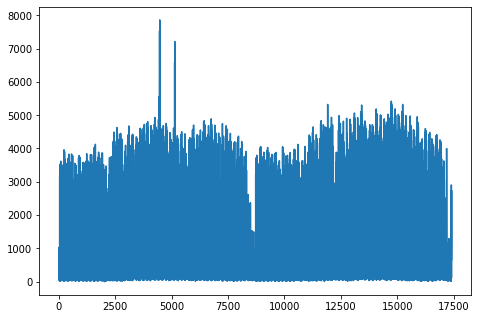

In [188]:
ax = plt.figure()
eixo1 = ax.add_axes([0,0,1,1])
eixo1.plot(bike['cnt']);

In [192]:
year1 = bike[bike['timestamp'] < '2016-01-04']

In [193]:
year2 = bike[bike['timestamp'] >= '2016-01-04']

In [301]:
year1_total = year1.groupby('season').sum().reset_index()

In [325]:
year2_total = year2.groupby('season').sum().reset_index()

In [322]:
year1_total.replace(3.0, value='winter', inplace=True)

In [330]:
year2_total.replace(3.0,value='winter', inplace=True)
year2_total

,season,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend
0,spring,2427307,22811.500000,19930.500000,153181.5,33846.500000,5930.0,96,609.0
1,summer,3236719,40768.500000,40718.500000,150332.0,33452.500000,5334.0,24,623.0
2,fall,2638184,28003.333333,26539.333333,161207.0,29407.666667,5669.0,spring,610.0
3,winter,1843155,15846.000000,11476.500000,171880.0,35024.500000,6437.0,72,622.0


In [323]:
year1_total

,season,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend
0,spring,2422929,24058.0,21474.5,148239.25,38195.250000,5482.0,96,646.0
1,summer,3187890,40089.0,39949.5,142917.50,35791.000000,5115.0,24,624.0
2,fall,2434856,28104.5,27284.0,166233.50,32256.166667,6179.0,spring,616.0
3,winter,1714932,17438.5,13251.0,165476.00,39136.500000,7268.0,72,620.0


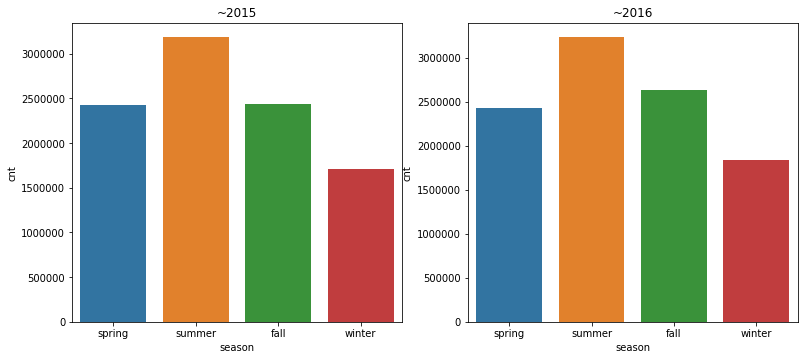

In [354]:
fig, ax = plt.subplots(nrows= 1,ncols=2, figsize= (13,5.5))

sns.barplot(x='season', y='cnt', data=year1_total, ax=ax[0]).set_title('~2015')
sns.barplot(x='season', y='cnt', data=year2_total, ax=ax[1]).set_title('~2016');

In [346]:
#-------------Analisando por Summer-----------------------

In [381]:
#Número de aluguéis no verão
summer = bike[bike['season']==1]
summer['t1']

3544     10.0
3545     10.0
3546      9.0
3547      9.0
3548      9.0
         ... 
14448    22.0
14449    21.0
14450    20.0
14451    19.0
14452    18.0
Name: t1, Length: 4387, dtype: float64

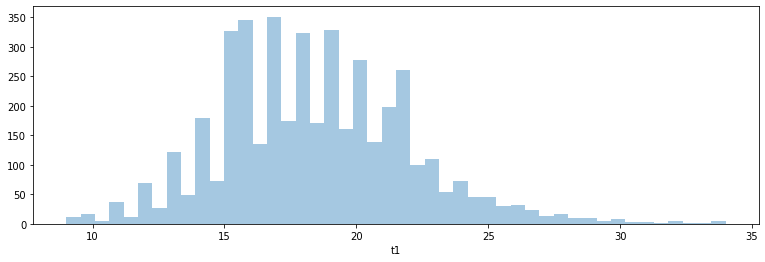

In [382]:
figsum = plt.figure(figsize= (13,4))

sns.distplot(summer['t1'], kde=False);

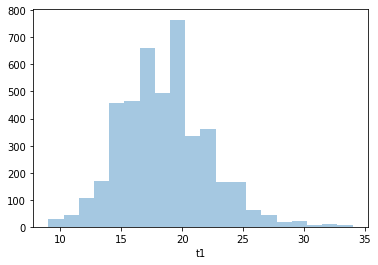

In [390]:
sns.distplot(summer['t1'], bins=20, kde = False)

In [394]:
summer.groupby('t1').sum()

,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
t1,,,,,,,,
9.0,729,60.0,669.0,141.0,13.0,0.0,0.0,9.0
9.5,1622,21.5,218.5,49.0,4.0,0.0,0.0,3.0
10.0,7979,139.0,1384.0,236.0,50.0,0.0,2.0,17.0
10.5,4998,48.5,384.5,70.5,9.0,0.0,1.0,5.0
11.0,22609,407.0,2901.0,530.0,88.0,0.0,3.0,37.0
11.5,3992,126.5,814.5,109.5,21.0,0.0,3.0,11.0
12.0,55785,840.0,5732.5,1066.0,204.0,0.0,17.0,70.0
12.5,17954,337.5,2121.0,385.5,60.0,0.0,9.0,27.0
13.0,84532,1573.0,9685.5,1787.5,334.0,0.0,22.0,121.0
